In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


In [6]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [16]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [24]:
train_images.shape

(60000, 28, 28)

In [17]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

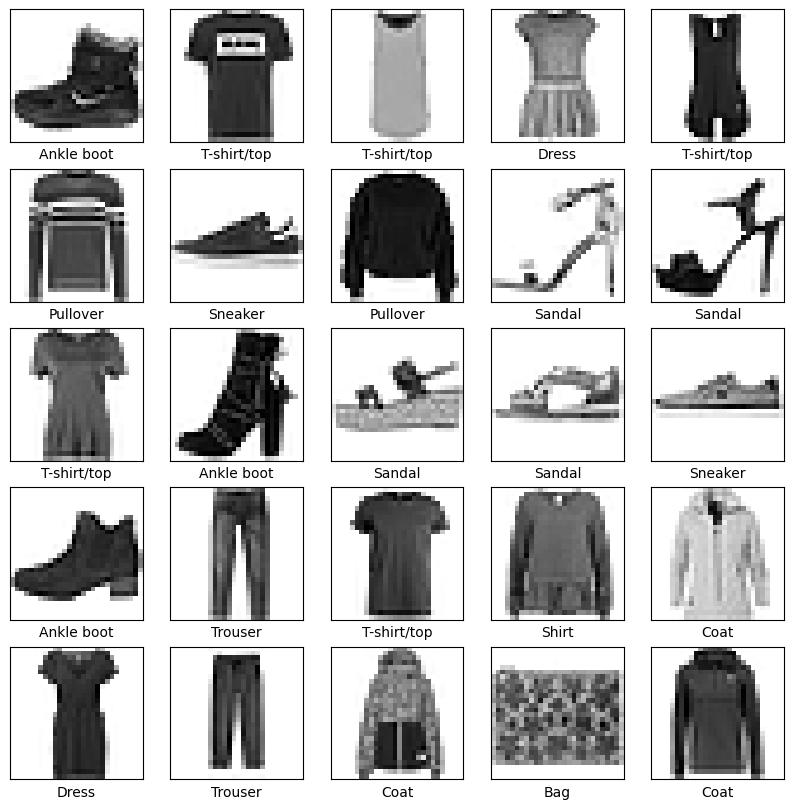

In [21]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [42]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(28*28, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(
    monitor='loss',
    patience=2,
    restore_best_weights=True
)

history = model.fit(
    train_images,
    train_labels,
    validation_data=(test_images, test_labels),
    epochs=1_000,
    batch_size=500,
    callbacks=[callback]
)

Epoch 1/1000
120/120 [==============================] - 1s 3ms/step - loss: 13.3780 - accuracy: 0.7277 - val_loss: 2.1342 - val_accuracy: 0.7713
Epoch 2/1000
120/120 [==============================] - 0s 2ms/step - loss: 1.3826 - accuracy: 0.8126 - val_loss: 1.1138 - val_accuracy: 0.8129
Epoch 3/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.9632 - accuracy: 0.8272 - val_loss: 1.0764 - val_accuracy: 0.8174
Epoch 4/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.7883 - accuracy: 0.8408 - val_loss: 0.8428 - val_accuracy: 0.8307
Epoch 5/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.6445 - accuracy: 0.8504 - val_loss: 0.9575 - val_accuracy: 0.8191
Epoch 6/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.5545 - accuracy: 0.8600 - val_loss: 0.7382 - val_accuracy: 0.8313
Epoch 7/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.4913 - accuracy: 0.8659 - val_loss: 0.6546 - val_accuracy

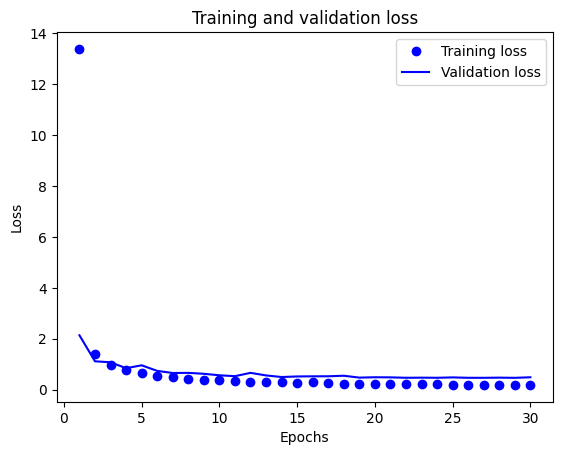

In [43]:
# In-text Citation: Chollet (2017)
history_dict = history.history
history_dict.keys()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.show()

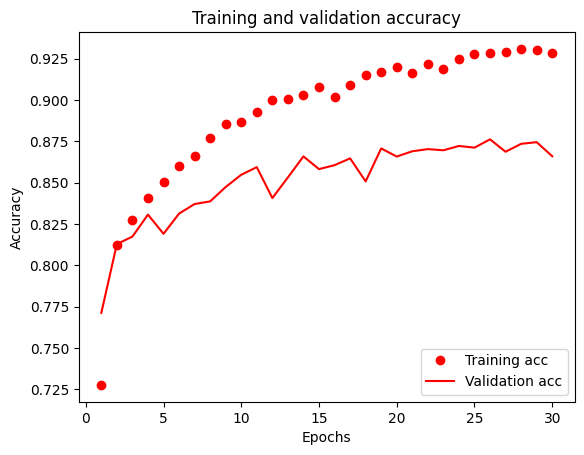

In [44]:
# In-text Citation: Chollet (2017)
plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [29]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.6324 - accuracy: 0.8538 - 255ms/epoch - 814us/step

Test accuracy: 0.8537999987602234


In [45]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [46]:
probability_model = tf.keras.Sequential([
    model, 
    tf.keras.layers.Softmax()
])
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 675us/step


In [48]:

def plot_and_predict(idx):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(idx, predictions[idx], test_labels, test_images)
    plt.subplot(1,2,2)
    plot_value_array(idx, predictions[idx],  test_labels)
    plt.show()

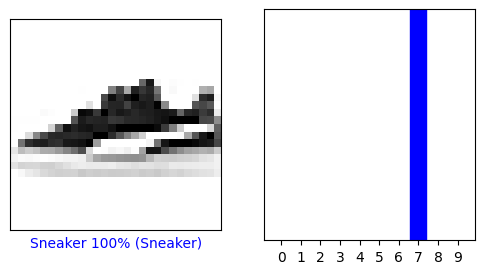

In [52]:
plot_and_predict(36)